In [5]:
import pandas as pd
import joblib
import datetime

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [8]:
df = pd.read_pickle('data/df_result.pkl')

In [9]:
df

,target_action,visit_number_std,dist_to_msk_std,pixels_std,screen_aspect_std,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,...,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,daytime_afternoon,daytime_evening,daytime_morning,daytime_night
0,0,-0.26012,0.182531,-0.711961,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,-0.26012,-0.439447,-0.378943,0.671263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,-0.26012,1.119588,-0.711961,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,-0.26012,-0.439447,-0.466333,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,-0.02238,-0.439447,-0.466333,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,0,-0.26012,-0.439447,2.199873,-1.840084,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1860038,0,-0.26012,-0.113202,-0.377368,0.671263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1860039,0,-0.26012,-0.439447,-0.761866,0.043426,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1860040,0,-0.26012,0.232705,-0.355072,0.671263,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# разделите выборку на треин и тест в отношении 70/30
train_x, test_x, train_y, test_y = train_test_split(
    df.drop(columns='target_action'), 
    df['target_action'], 
    test_size=0.3, 
    random_state=42)

# Случайный лес

In [7]:
forest = RandomForestClassifier(random_state=42)
forest.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [8]:
pred_rf = forest.predict(test_x)
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
confusion_matrix(test_y, pred_rf)

array([[503046,   1629],
       [ 14806,    188]], dtype=int64)

In [10]:
print('roc_auc_score для случайного леса:\n', roc_auc_score(test_y, forest.predict_proba(test_x)[:, 1]))

roc_auc_score для случайного леса:
 0.6139738621295185


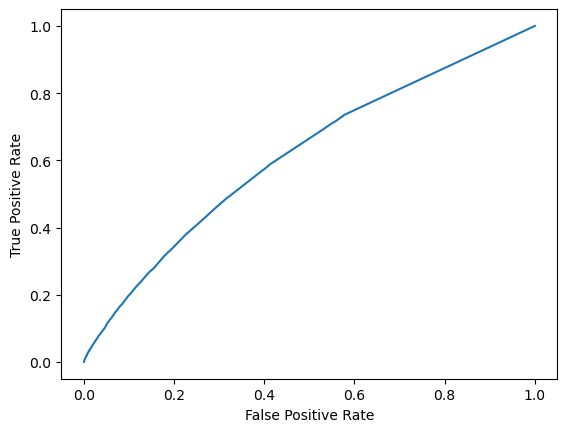

In [12]:
y_score = forest.predict_proba(test_x)[:, 1]

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Логистическая регрессия

In [13]:
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(train_x, train_y)

LogisticRegression(max_iter=2000, random_state=42)

In [14]:
pred_lr = logreg.predict(test_x)
pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
confusion_matrix(test_y, pred_lr)

array([[504672,      3],
       [ 14992,      2]], dtype=int64)

In [16]:
print('roc_auc_score для логистической регрессии:\n', roc_auc_score(test_y, logreg.decision_function(test_x)))

roc_auc_score для логистической регрессии:
 0.6698707588251529


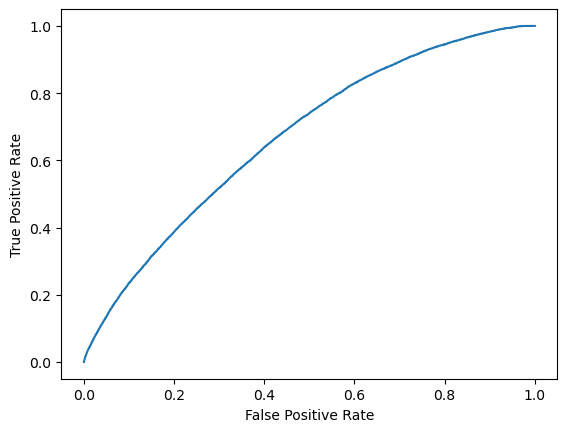

In [17]:
y_score = logreg.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# HistGradientBoosting

In [22]:
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(train_x, train_y)

HistGradientBoostingClassifier(random_state=42)

In [23]:
pred_hgb = hgb.predict(test_x)
pred_hgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
confusion_matrix(test_y, pred_hgb)

array([[504664,     11],
       [ 14974,     20]], dtype=int64)

In [25]:
print('roc_auc_score для HGBoosting:\n', roc_auc_score(test_y, hgb.decision_function(test_x)))

roc_auc_score для HGBoosting:
 0.6927111691095751


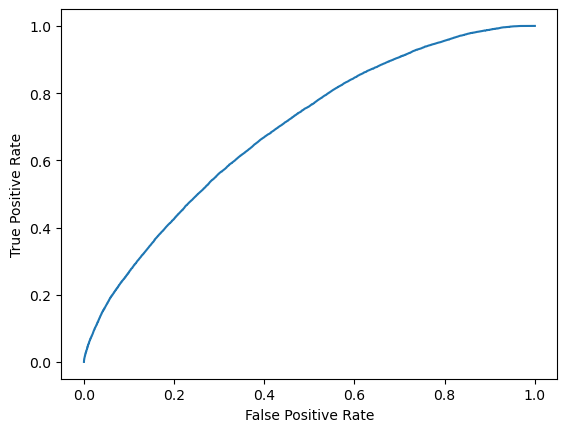

In [26]:
y_score = hgb.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# HistGradientBoosting (tuning)

In [27]:
hgb = HistGradientBoostingClassifier(l2_regularization=1.0, class_weight={0: 1, 1:5}, random_state=42)


In [28]:
hgb.fit(train_x, train_y)

HistGradientBoostingClassifier(class_weight={0: 1, 1: 5}, l2_regularization=1.0,
                               random_state=42)

In [29]:
pred_hgb = hgb.predict(test_x)
pred_hgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
confusion_matrix(test_y, pred_hgb)

array([[504392,    283],
       [ 14881,    113]], dtype=int64)

In [31]:
print('roc_auc_score для HGBoosting (тюнинг):\n', roc_auc_score(test_y, hgb.decision_function(test_x)))

roc_auc_score для HGBoosting (тюнинг):
 0.6939650627180083


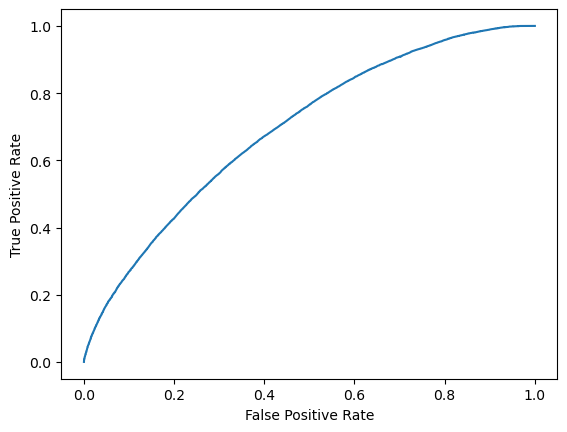

In [32]:
y_score = hgb.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Выводы

Лучше всего показала себя модель HistGradientBoosting, c метрикой roc-auc 0.6939

Посколько специфика задачи такова, что доля 1 в целевом действии крайне мала, в целях увеличения количества действительноположительных предсказаний, будем использовать пороговое значение для сигмоиды, отличное от 0.5, при этом будет расти и доля ложнопложительных предсказаний

In [33]:
# Определим оптимальное значение порога сигмоиды 
# по оптимальному соотношению True Positive и Fasle Positive
def tprfpr(confm):
    tn = confm[0,0]
    fp = confm[0,1]
    fn = confm[1,0]
    tp = confm[1,1]
    return tp / (fn + tp),  fp / (tn + fp)

In [34]:
def predict_custom(pred_probs, trsh=0.5):
    return [(0 if p1 < trsh else 1) for p0, p1 in pred_probs]

In [35]:
def optimal_treshold(classif):
    """finds optimal trashold value for prediction"""
    pred_proba = classif.predict_proba(test_x)

    a, b = 0, 1
    while abs(a - b) > 1e-3:
        m = (a + b) / 2
        rate = lambda p: float.__sub__(*tprfpr(confusion_matrix(test_y, p)))
        yl = rate(predict_custom(pred_proba, trsh=(a+m)/2)), (a+m)/2
        yr = rate(predict_custom(pred_proba, trsh=(m+b)/2)), (m+b)/2
        if yl[0] > yr[0]:
            b = m
        else:
            a = m
    return max([yl, yr])[1]

print(f"Оптимальное пороговое значение: {optimal_treshold(hgb)}")

Оптимальное пороговое значение: 0.13720703125


Посмотрим матрицу ошибок для данного значения

In [36]:
pred_hgb2 = predict_custom(hgb.predict_proba(test_x), trsh=0.13720703125)

In [37]:
confusion_matrix(test_y, pred_hgb2)

array([[308318, 196357],
       [  5077,   9917]], dtype=int64)

Посчитаем точность при кросс-валидации:

In [38]:
cv_score = cross_val_score(
    hgb, 
    df.drop(columns='target_action'), 
    df['target_action'],
    cv=5,
    scoring='roc_auc'
)

In [39]:
cv_score

array([0.6932086 , 0.69304375, 0.68991973, 0.69131743, 0.69738715])

In [40]:
cv_score.mean(), cv_score.std()

(0.6929753327578186, 0.0025143025402246193)

Обучим модель на всём датасете, также добавим тюнинг модели

In [41]:
hgb_final = HistGradientBoostingClassifier(l2_regularization=1.0, class_weight={0: 1, 1:5}, random_state=42)
hgb_final.fit(
    df.drop(columns='target_action'),
    df['target_action']
)

HistGradientBoostingClassifier(class_weight={0: 1, 1: 5}, l2_regularization=1.0,
                               random_state=42)

In [42]:
print('roc_auc_score для HGBoosting (весь датасет):\n', roc_auc_score(test_y, hgb_final.decision_function(test_x)))

roc_auc_score для HGBoosting (весь датасет):
 0.7053930953666453


In [43]:
confusion_matrix(test_y, hgb_final.predict(test_x))

array([[504457,    218],
       [ 14876,    118]], dtype=int64)

Сохраним в pickle

In [44]:
now = datetime.datetime.now()

joblib.dump({
    'model': hgb_final,
    'author': 'Arseniy Kubanov',
    'classifier': 'HistGradientBoosting',
    'version': 1.2,
    'date': now.isoformat(),
    'roc_auc_mean': cv_score.mean(),
    'optimal_trsh': optimal_treshold(hgb)
},
    f"model/hist_{now.strftime('%y%m%d-%H%M%S')}.pkl"
)

['model/hist_230416-190154.pkl']